<a href="https://colab.research.google.com/github/RossUsesGit/Visualizations-and-Data-Analysis/blob/main/Creating_DataFrame_BULAONG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Create sample data (like the car sales file I made earlier)
data = {
    "Sale_ID": [101, 102, 103, 104, 105],
    "Date": ["2025-09-17"] * 5,   # yesterday’s date
    "Car_Brand": ["Toyota", "Honda", "Ford", "Nissan", "Hyundai"],
    "Car_Model": ["Corolla", "Civic", "Focus", "Altima", "Elantra"],
    "Year": [2021, 2020, 2019, 2022, 2021],
    "Price": [20000, 22000, 18000, 24000, 21000],
    "Buyer_Name": ["John Doe", "Jane Smith", "Carlos Reyes", "Anna Cruz", "Mark Lee"]
}

# Make DataFrame
car_sales = pd.DataFrame(data, index=["Sale1","Sale2","Sale3","Sale4","Sale5"])

# Show DataFrame
print(car_sales)

# Access one record (like purchases.loc['June'])
print(car_sales.loc["Sale1"])

# Save as CSV in Google Drive
file_path_csv = '/content/drive/MyDrive/data_vda/car_sales_vda.csv'
car_sales.to_csv(file_path_csv, index=False)

# Save as Excel in Google Drive
file_path_xlsx = '/content/drive/MyDrive/data_vda/car_sales_vda.xlsx'
car_sales.to_excel(file_path_xlsx, index=False)

print("Files saved to Google Drive:")
print(file_path_csv)
print(file_path_xlsx)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       Sale_ID        Date Car_Brand Car_Model  Year  Price    Buyer_Name
Sale1      101  2025-09-17    Toyota   Corolla  2021  20000      John Doe
Sale2      102  2025-09-17     Honda     Civic  2020  22000    Jane Smith
Sale3      103  2025-09-17      Ford     Focus  2019  18000  Carlos Reyes
Sale4      104  2025-09-17    Nissan    Altima  2022  24000     Anna Cruz
Sale5      105  2025-09-17   Hyundai   Elantra  2021  21000      Mark Lee
Sale_ID              101
Date          2025-09-17
Car_Brand         Toyota
Car_Model        Corolla
Year                2021
Price              20000
Buyer_Name      John Doe
Name: Sale1, dtype: object
Files saved to Google Drive:
/content/drive/MyDrive/data_vda/car_sales_vda.csv
/content/drive/MyDrive/data_vda/car_sales_vda.xlsx


In [ ]:
# Find Model Drives with only 512GB

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df_orig = pd.read_excel('/content/drive/MyDrive/data_vda/ComputerData.xlsx')
df_trimmed = df_orig[['Brand','Model','Storage (GB)']].copy()

df_filtered = df_trimmed[df_trimmed["Storage (GB)"] == 512].copy()
df_filtered

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Brand,Model,Storage (GB)
0,Dell,XPS 13,512
3,Lenovo,ThinkPad X1,512
4,Asus,ZenBook 14,512


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         Rep    Total
0    Andrews   438.37
1       Gill  1336.33
2     Howard   536.75
3    Jardine  2812.19
4      Jones  2107.20
5     Kivell  2103.54
6     Morgan  2761.67
7     Parent  4285.56
8      Smith  1891.43
9    Sorvino   458.61
10  Thompson  1203.11


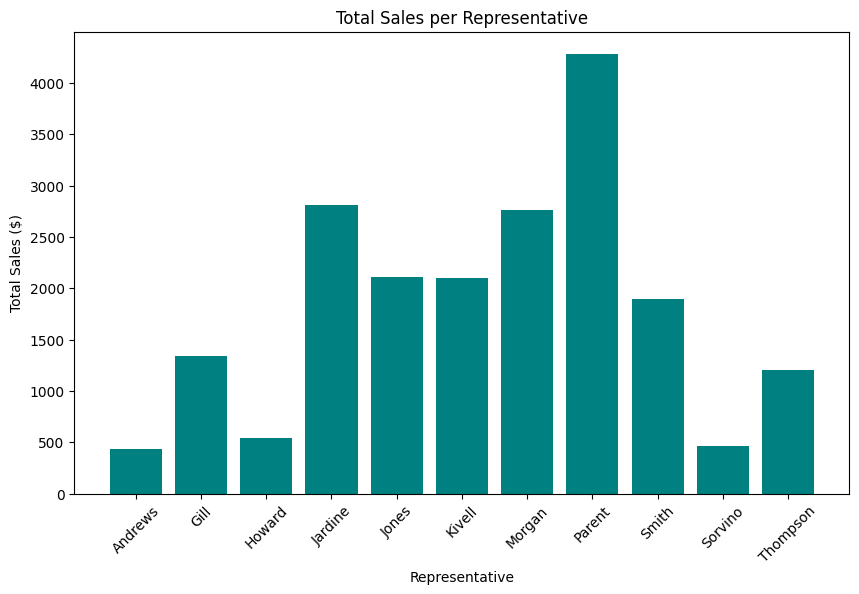

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/data_vda/SampleData.csv')

# Region Sort
region_sort_order = ["East","West","Central"]
df["Region"] = pd.Categorical(df["Region"], categories=region_sort_order, ordered=True).copy()

# Rep Sort
df['Rep'] = pd.Categorical(df['Rep'])

# Handle missing Items
df['Item'] = df['Item'].fillna("Unknown")

# Clean "Total" column
df['Total'] = df['Total'].astype(str).str.replace(',', '').str.strip()
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

# Group by Rep for total sales
rep_sales = df.groupby("Rep", observed=True)["Total"].sum().reset_index()


print(rep_sales)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(rep_sales["Rep"], rep_sales["Total"], color="teal")
plt.title("Total Sales per Representative")
plt.xlabel("Representative")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()
